# Slope Stability Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # importing the necessary libraries

In [2]:
df=pd.read_excel(r'D:\GTE Project\GTE No surcharge data.xlsx') # importing the file
df.head()

,h(m),q (kPa),x (m),φ(degrees),c(kPa),Slope,Slope(degrees),FS
0,3.0,0.0,NaN,5.0,25.0,2H:1V,26.565051,3.110
1,3.0,0.0,NaN,5.0,50.0,2H:1V,26.565051,5.683
2,3.0,0.0,NaN,5.0,100.0,2H:1V,26.565051,10.756
3,3.0,0.0,NaN,10.0,20.0,2H:1V,26.565051,2.857
4,3.0,0.0,NaN,10.0,50.0,2H:1V,26.565051,6.173


## Data Exploration 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   h(m)            416 non-null    float64
 1   q (kPa)         416 non-null    float64
 2   x (m)           0 non-null      float64
 3   φ(degrees)      416 non-null    float64
 4   c(kPa)          416 non-null    float64
 5   Slope           416 non-null    object 
 6   Slope(degrees)  416 non-null    float64
 7   FS              417 non-null    float64
dtypes: float64(7), object(1)
memory usage: 26.2+ KB


In [4]:
df.describe()

,h(m),q (kPa),x (m),φ(degrees),c(kPa),Slope(degrees),FS
count,416.000000,416.0,0.0,416.000000,416.000000,416.000000,417.000000
mean,7.500000,0.0,NaN,21.730769,53.653846,42.172517,3.954521
std,3.358141,0.0,NaN,11.359816,40.847827,13.941840,2.800092
min,3.000000,0.0,NaN,5.000000,10.000000,26.565051,0.715000
25%,5.250000,0.0,NaN,10.000000,20.000000,31.908813,2.104000
50%,7.500000,0.0,NaN,20.000000,50.000000,39.345034,3.144000
75%,9.750000,0.0,NaN,30.000000,100.000000,49.608737,4.927000
max,12.000000,0.0,NaN,40.000000,150.000000,63.434949,16.980000


In [5]:
df.columns

Index(['h(m)', 'q (kPa)', 'x (m)', 'φ(degrees)', 'c(kPa)', 'Slope',
       'Slope(degrees)', 'FS'],
      dtype='object')

In [6]:
for i in df.columns:                      
    print(i)
    print(df[i].value_counts())
    print('_'*100)

h(m)
3.0     104
6.0     104
9.0     104
12.0    104
Name: h(m), dtype: int64
____________________________________________________________________________________________________
q (kPa)
0.0    416
Name: q (kPa), dtype: int64
____________________________________________________________________________________________________
x (m)
Series([], Name: x (m), dtype: int64)
____________________________________________________________________________________________________
φ(degrees)
10.0    64
15.0    64
5.0     48
20.0    48
25.0    48
30.0    48
35.0    48
40.0    48
Name: φ(degrees), dtype: int64
____________________________________________________________________________________________________
c(kPa)
50.0     112
100.0     80
20.0      80
10.0      48
30.0      48
150.0     32
25.0      16
Name: c(kPa), dtype: int64
____________________________________________________________________________________________________
Slope
2H:1V      104
1.5H:1V    104
1H:1V      104
0.5H:1V    104
Name:

## Data Cleaning and Transformation

In [7]:
df1=df.copy() # making a copy of the original dataset
df1.columns

Index(['h(m)', 'q (kPa)', 'x (m)', 'φ(degrees)', 'c(kPa)', 'Slope',
       'Slope(degrees)', 'FS'],
      dtype='object')

In [8]:
df1.isnull().sum() # checking for null values

h(m)                1
q (kPa)             1
x (m)             417
φ(degrees)          1
c(kPa)              1
Slope               1
Slope(degrees)      1
FS                  0
dtype: int64

In [9]:
df1.drop('x (m)',axis=1,inplace=True) # dropping the column that has all null values

In [10]:
df1.columns=['Height','Surcharge','Angle_of_Friction','Cohesion','Slope','Slope_Angle','FS'] 
                                                                                                         # renaming the columns

In [11]:
df1.columns

Index(['Height', 'Surcharge', 'Angle_of_Friction', 'Cohesion', 'Slope',
       'Slope_Angle', 'FS'],
      dtype='object')

In [12]:
df1[df1.duplicated()] # checking for duplicated records

,Height,Surcharge,Angle_of_Friction,Cohesion,Slope,Slope_Angle,FS


In [13]:
# no duplicate records

In [14]:
df1.shape

(417, 7)

In [15]:
df1=df1.dropna() #dropping records with atleast one null value

{'whiskers': [<matplotlib.lines.Line2D at 0x20cb32e8550>,
 'caps': [<matplotlib.lines.Line2D at 0x20cb32e8af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cb32e83a0>],
 'medians': [<matplotlib.lines.Line2D at 0x20cb32fe0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cb32fe3a0>],
 'means': []}

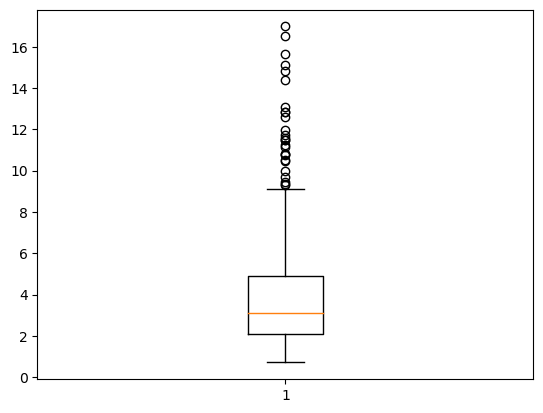

In [16]:
plt.boxplot(df1['FS'])   # creating a boxplot 

In [17]:
df1['FS'].describe()

count    416.000000
mean       3.944981
std        2.796671
min        0.715000
25%        2.103000
50%        3.130500
75%        4.916500
max       16.980000
Name: FS, dtype: float64

In [18]:
Q1=df1['FS'].quantile(0.25)                          
Q3=df1['FS'].quantile(0.75)
IQR =Q3-Q1
Lower_whisker=Q1-(1.5*IQR)
Upper_whisker=Q3+(1.5*IQR)
print('Lower whisker is {}'.format(Lower_whisker))
print('Upper whisker is {}'.format(Upper_whisker))

Lower whisker is -2.11725
Upper whisker is 9.13675


In [19]:
outliners=df1[df1['FS']>9.161499999999998]      # finding the outliners
outliners.shape

(27, 7)

In [20]:
27/416 *100  # calculating the percentage of outliners

6.490384615384616

In [21]:
df2=df1[df1['FS']<=9.161499999999998]
df2  # choosing the dataset devoid of outliners

,Height,Surcharge,Angle_of_Friction,Cohesion,Slope,Slope_Angle,FS
0,3.0,0.0,5.0,25.0,2H:1V,26.565051,3.110
1,3.0,0.0,5.0,50.0,2H:1V,26.565051,5.683
3,3.0,0.0,10.0,20.0,2H:1V,26.565051,2.857
4,3.0,0.0,10.0,50.0,2H:1V,26.565051,6.173
7,3.0,0.0,15.0,20.0,2H:1V,26.565051,3.224
...,...,...,...,...,...,...,...
411,12.0,0.0,35.0,30.0,0.5H:1V,63.434949,1.712
412,12.0,0.0,35.0,50.0,0.5H:1V,63.434949,2.241
413,12.0,0.0,40.0,10.0,0.5H:1V,63.434949,1.196
414,12.0,0.0,40.0,20.0,0.5H:1V,63.434949,1.511


In [22]:
df2['Slope_Angle']=df2['Slope_Angle'].round(2) # rounding the values to 2 decimal places

C:\Users\reeba\AppData\Local\Temp\ipykernel_14940\1209714036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Slope_Angle']=df2['Slope_Angle'].round(2) # rounding the values to 2 decimal places


In [23]:
#df2.to_excel(r'D:\GTE Project\Cleaned_data.xlsx',index=False)

## Predictive Analysis

In [24]:
X=df2.drop(['FS','Surcharge','Slope'],axis=1)  # defining X dataframe
X.columns

Index(['Height', 'Angle_of_Friction', 'Cohesion', 'Slope_Angle'], dtype='object')

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 415
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Height             389 non-null    float64
 1   Angle_of_Friction  389 non-null    float64
 2   Cohesion           389 non-null    float64
 3   Slope_Angle        389 non-null    float64
dtypes: float64(4)
memory usage: 15.2 KB


In [26]:
y=df2[['FS']] # defining y

In [27]:
from sklearn.model_selection import train_test_split  # splitting the dataset into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
y_train.head()

,FS
240,7.924
126,7.802
398,1.679
317,9.126
127,3.640


In [29]:
X_train.head()

,Height,Angle_of_Friction,Cohesion,Slope_Angle
240,6.0,10.0,150.0,45.00
126,3.0,35.0,50.0,33.69
398,12.0,15.0,50.0,63.43
317,3.0,10.0,100.0,63.43
127,3.0,40.0,10.0,33.69


### Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression # importing the necessary class from sklearn package of scikit learn library
model1=LinearRegression()  # using Linear Regression Model

In [31]:
model1.fit(X_train,y_train)  # training the model

LinearRegression()

In [33]:
score1 = model1.score(X_test,y_test)
score1                          # calculating the accuracy of the model

0.8167429737657614

### Decision Tree Regression Model

In [36]:
from sklearn.tree import DecisionTreeRegressor # importing the necessary class from sklearn package of scikit learn library
model2 = DecisionTreeRegressor()  # using Linear Regression Model

In [37]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
score2 = model2.score(X_test,y_test)
score2

0.959520061731363

In [ ]:
# Model 2 has higher accuracy

### Prediction

In [40]:
i=pd.DataFrame([[3,28,100,40]],columns=['Height','Angle_of_Friction','Cohesion','Slope_Angle']) # predicting FS using ML algorithm
model2.predict(i)

array([9.126])

## Thank you!